<h1>Classification Model: Predicting if a worker is hospitalized by type of severe injuries or amputation. Data: Occupational Safety and Health Administration,  2016 - 2021 Injury and Illness Data</h1>
<h3>Autor: Franchi Uzcategui</h3>

In [1]:
import pandas as pd
import us
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

## plotting
import folium
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
# Any results you write to the current directory are saved as output.


Bad key "text.kerning_factor" on line 4 in
C:\Users\Franchi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Table of Contents

<li><a href="#wrangling">I.Introduction
<li><a href="#wrangling">II.Data   
<li><a href="#wrangling">1. Data Collection</a></li>
<li><a href="#cleaning">2. Data Cleaning</a></li>
<li><a href="#methodology">III.Methodology
<li><a href="#da">3. Data Analysis</a></li>
<li><a href="#results">III.Results    
<li><a href="#eda">4.Data visualization </a></li>
<li><a href="#eda"> IV. Discussion</a></li>
<li><a href="#eda"> V. Conclusion</a></li>
<li><a href="#eda"> VI. Limitations</a></li>

## 1.  Data Collection

From Occupational Safety and Health Administration, Data from 1/1/2015 through 7/31/2021 https://www.osha.gov/severeinjury 
"OSHA requires employers to report all severe work-related injuries, defined as an amputation, in-patient hospitalization, or loss of an eye. The requirement began on January 1, 2015. This page provides information from those reports, including a description of the incident and the name and address of the establishment where it happened. Injuries are coded using the Occupational Injury and Illness Classification System.

You can download a file of the reports below. The reports will be updated periodically and represent incidents under federal OSHA jurisdiction only. They do not include incidents under state plan state jurisdiction.

Please be aware the geocodes (latitude/longitude) provided were obtained through third party services based on address information provided with the injury report. The precision varies by case, and accuracy is not guaranteed."

In [2]:
data = pd.read_csv("C:/Users/Franchi/Documents/Personal/OSHA Injuries/severe_injury/January2015toJuly2021.csv", encoding='cp1252')
data.head()

C:\Users\Franchi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


## 2. Data Cleaning

In [3]:
data.shape

(66699, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66699 entries, 0 to 66698
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      66699 non-null  int64  
 1   UPA                     66699 non-null  int64  
 2   EventDate               66699 non-null  object 
 3   Employer                66699 non-null  object 
 4   Address1                66683 non-null  object 
 5   Address2                6108 non-null   object 
 6   City                    66684 non-null  object 
 7   State                   66699 non-null  object 
 8   Zip                     66680 non-null  float64
 9   Latitude                66664 non-null  float64
 10  Longitude               66664 non-null  float64
 11  Primary NAICS           66697 non-null  object 
 12  Hospitalized            66699 non-null  float64
 13  Amputation              66694 non-null  float64
 14  Inspection              22436 non-null

In [5]:
data.isnull().sum()

ID                            0
UPA                           0
EventDate                     0
Employer                      0
Address1                     16
Address2                  60591
City                         15
State                         0
Zip                          19
Latitude                     35
Longitude                    35
Primary NAICS                 2
Hospitalized                  0
Amputation                    5
Inspection                44263
Final Narrative               0
Nature                        0
NatureTitle                   0
Part of Body                  0
Part of Body Title            0
Event                         0
EventTitle                    0
Source                        0
SourceTitle                   0
Secondary Source          43581
Secondary Source Title    43581
dtype: int64

Dropping colummns with several null values

In [6]:
data.drop(['Address2', 'Inspection', 'Secondary Source', 'Secondary Source Title'],axis=1, inplace=True)

Dropping no needed colummns

In [7]:
data.drop(['UPA', 'Address1', 'Final Narrative', 'Primary NAICS', 'Nature', 'Event', 'Part of Body', 'Source'],axis=1, inplace=True)

Dropping null values by rows

In [8]:
data = data.dropna()
data.head()

,ID,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle
0,2015010015,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,1.0,0.0,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker
1,2015010016,1/1/2015,Kalahari Manufacturing LLC,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,1.0,0.0,Second degree heat (thermal) burns,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches"
2,2015010018,1/1/2015,Schneider National Bulk Carrier,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,1.0,0.0,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck"
3,2015010019,1/1/2015,PEPSI BOTTLING GROUP INC.,MACON,GEORGIA,31206.0,32.77,-83.65,1.0,0.0,"Soreness, pain, hurt-nonspecified injury","Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered
4,2015010020,1/1/2015,North American Pipe Corporation,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,1.0,0.0,Fractures,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi..."


Checking null values

In [9]:
data.isnull().sum()

ID                    0
EventDate             0
Employer              0
City                  0
State                 0
Zip                   0
Latitude              0
Longitude             0
Hospitalized          0
Amputation            0
NatureTitle           0
Part of Body Title    0
EventTitle            0
SourceTitle           0
dtype: int64

Checking the new shape of dataframe

In [10]:
data.shape

(66640, 14)

Replacing State abbreviations for State Name

 US state abbreviations https://gist.github.com/JeffPaine/3083347 

In [11]:
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [12]:
data = data.replace({'State': states})
data

,ID,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle
0,2015010015,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,1.0,0.0,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker
1,2015010016,1/1/2015,Kalahari Manufacturing LLC,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,1.0,0.0,Second degree heat (thermal) burns,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches"
2,2015010018,1/1/2015,Schneider National Bulk Carrier,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,1.0,0.0,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck"
3,2015010019,1/1/2015,PEPSI BOTTLING GROUP INC.,MACON,GEORGIA,31206.0,32.77,-83.65,1.0,0.0,"Soreness, pain, hurt-nonspecified injury","Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered
4,2015010020,1/1/2015,North American Pipe Corporation,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,1.0,0.0,Fractures,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66694,2021076378,7/31/2021,VIRGINIA INTERNATIONAL TERMINALS INC.,PORTSMOUTH,Virginia,23703.0,36.83,-76.33,1.0,0.0,Fractures,Ankle(s),Fall on water vehicle,Barge
66695,2021076379,7/31/2021,Cedar Grove Warehousing LLC,PLYMOUTH,Wisconsin,53073.0,43.73,-87.97,1.0,0.0,Fractures,"Shoulder(s), including clavicle(s), scapula(e)","Other fall to lower level, unspecified",Step ladders
66696,2021076380,7/31/2021,MVP PLUMBING CORP.,ROMEOVILLE,Illinois,60446.0,41.59,-88.10,1.0,0.0,"Cuts, lacerations","Neck, except internal location of diseases or ...",Injured by slipping or swinging object held by...,"Saws-powered, except chainsaws"
66697,2021076384,7/31/2021,"Agropur, Inc.",LAKE NORDEN,South Dakota,57248.0,44.58,-97.21,1.0,0.0,"Electrocutions, electric shocks",BODY SYSTEMS,"Direct exposure to electricity, greater than 2...","Switchboards, switches, fuses"


Converting and overwriting values in State, City and Employer columns, from upper case to title case

In [13]:
data['State']= data['State'].str.upper().str.title()

In [14]:
data['City']= data['City'].str.upper().str.title()

In [15]:
data['Employer']= data['Employer'].str.upper().str.title()

In [16]:
data.head()

,ID,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle
0,2015010015,1/1/2015,Fci Otisville Federal Correctional Institution,Otisville,New York,10963.0,41.46,-74.53,1.0,0.0,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker
1,2015010016,1/1/2015,Kalahari Manufacturing Llc,Lake Delton,Wisconsin,53940.0,43.59,-89.79,1.0,0.0,Second degree heat (thermal) burns,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches"
2,2015010018,1/1/2015,Schneider National Bulk Carrier,Coraopolis,Pennsylvania,15108.0,40.49,-80.11,1.0,0.0,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck"
3,2015010019,1/1/2015,Pepsi Bottling Group Inc.,Macon,Georgia,31206.0,32.77,-83.65,1.0,0.0,"Soreness, pain, hurt-nonspecified injury","Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered
4,2015010020,1/1/2015,North American Pipe Corporation,Janesville,Wisconsin,53545.0,42.67,-89.04,1.0,0.0,Fractures,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi..."


Checking null values

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66640 entries, 0 to 66698
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  66640 non-null  int64  
 1   EventDate           66640 non-null  object 
 2   Employer            66640 non-null  object 
 3   City                66640 non-null  object 
 4   State               66640 non-null  object 
 5   Zip                 66640 non-null  float64
 6   Latitude            66640 non-null  float64
 7   Longitude           66640 non-null  float64
 8   Hospitalized        66640 non-null  float64
 9   Amputation          66640 non-null  float64
 10  NatureTitle         66640 non-null  object 
 11  Part of Body Title  66640 non-null  object 
 12  EventTitle          66640 non-null  object 
 13  SourceTitle         66640 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 7.6+ MB


Ckecking duplicate IDs. There are 63 duplicate values to remove.

In [18]:
data.ID.nunique()

66635

Removing duplicates by the ID column

In [19]:
data = data.drop_duplicates(subset=['ID']).reset_index()
data.head()

,index,ID,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle
0,0,2015010015,1/1/2015,Fci Otisville Federal Correctional Institution,Otisville,New York,10963.0,41.46,-74.53,1.0,0.0,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker
1,1,2015010016,1/1/2015,Kalahari Manufacturing Llc,Lake Delton,Wisconsin,53940.0,43.59,-89.79,1.0,0.0,Second degree heat (thermal) burns,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches"
2,2,2015010018,1/1/2015,Schneider National Bulk Carrier,Coraopolis,Pennsylvania,15108.0,40.49,-80.11,1.0,0.0,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck"
3,3,2015010019,1/1/2015,Pepsi Bottling Group Inc.,Macon,Georgia,31206.0,32.77,-83.65,1.0,0.0,"Soreness, pain, hurt-nonspecified injury","Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered
4,4,2015010020,1/1/2015,North American Pipe Corporation,Janesville,Wisconsin,53545.0,42.67,-89.04,1.0,0.0,Fractures,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi..."


Removing the extra column 'index'

In [20]:
#data = data.drop(['index'], axis = 1)
data.head()

,index,ID,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle
0,0,2015010015,1/1/2015,Fci Otisville Federal Correctional Institution,Otisville,New York,10963.0,41.46,-74.53,1.0,0.0,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker
1,1,2015010016,1/1/2015,Kalahari Manufacturing Llc,Lake Delton,Wisconsin,53940.0,43.59,-89.79,1.0,0.0,Second degree heat (thermal) burns,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches"
2,2,2015010018,1/1/2015,Schneider National Bulk Carrier,Coraopolis,Pennsylvania,15108.0,40.49,-80.11,1.0,0.0,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck"
3,3,2015010019,1/1/2015,Pepsi Bottling Group Inc.,Macon,Georgia,31206.0,32.77,-83.65,1.0,0.0,"Soreness, pain, hurt-nonspecified injury","Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered
4,4,2015010020,1/1/2015,North American Pipe Corporation,Janesville,Wisconsin,53545.0,42.67,-89.04,1.0,0.0,Fractures,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi..."


Non duplicate values

In [21]:
data.shape

(66635, 15)

<h4>These data is already cleaned, but it needs transformation in order to use for modeling. The columns to modify are NatureTitle, EventDate, and Hospitalized </h4>

<h5>1.NatureTitle</h5>

I'll modify the NatureTitle column type to numeric values to use it as a predictor variable for the injury type.

Checking how many unique categories of NatureTitle in the dataframe. There are 191 categories

In [22]:
datas = data.sort_values(by='NatureTitle').nunique()
datas 

index                 66635
ID                    66635
EventDate              2402
Employer              47084
City                   7089
State                    58
Zip                   12456
Latitude               2411
Longitude              4549
Hospitalized              7
Amputation                3
NatureTitle             191
Part of Body Title      124
EventTitle              348
SourceTitle            1055
dtype: int64

In [23]:
datas = data.groupby(['NatureTitle']).count().reset_index()
datas
#data.groupby(['NatureTitle']).describe()

,NatureTitle,index,ID,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,Part of Body Title,EventTitle,SourceTitle
0,"Abdominal pain, unspecified",1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"Abrasions, scratches",83,83,83,83,83,83,83,83,83,83,83,83,83,83
2,Allergic dermatitis-acute,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Amputations,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618
4,"Amputations, avulsions, enucleations, n.e.c.",26,26,26,26,26,26,26,26,26,26,26,26,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,"Traumatic injuries to spinal cord, unspecified",16,16,16,16,16,16,16,16,16,16,16,16,16,16
187,Traumatic shock,1,1,1,1,1,1,1,1,1,1,1,1,1,1
188,Unspecified tachycardia (rapid heartbeat),1,1,1,1,1,1,1,1,1,1,1,1,1,1
189,"Viral diseases, unspecified",1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [24]:
dat = datas['NatureTitle']
dat

0                         Abdominal pain, unspecified
1                                Abrasions, scratches
2                           Allergic dermatitis-acute
3                                         Amputations
4        Amputations, avulsions, enucleations, n.e.c.
                            ...                      
186    Traumatic injuries to spinal cord, unspecified
187                                  Traumatic shock 
188         Unspecified tachycardia (rapid heartbeat)
189                       Viral diseases, unspecified
190                                          Whiplash
Name: NatureTitle, Length: 191, dtype: object

Creating the dictionary for all the strings from NatureTitle column. It is required to change the data type from string to integer.

In [25]:
data_dict = dat.to_dict()
data_dict

{0: 'Abdominal pain, unspecified',
 1: 'Abrasions, scratches',
 2: 'Allergic dermatitis-acute',
 3: 'Amputations',
 4: 'Amputations, avulsions, enucleations, n.e.c.',
 5: 'Amputations, avulsions, enucleations, unspecified',
 6: 'Anaphylactic shock, anaphylaxis',
 7: 'Anemia and other diseases of the blood and blood forming organs',
 8: 'Angina',
 9: 'Anxiety or panic disorder',
 10: 'Anxiety, stress, n.e.c.',
 11: 'Anxiety, stress, unspecified',
 12: 'Asphyxiations, strangulations, suffocations',
 13: 'Avulsions, enucleations',
 14: 'Bacterial diseases, unspecified',
 15: 'Blindness, low vision',
 16: 'Blisters',
 17: 'Bruises, contusions',
 18: 'Burns and corrosions, unspecified ',
 19: 'Burns and other injuries, except fractures, unspecified',
 20: 'Burns and other injuries, n.e.c.',
 21: 'Burns and smoke inhalation',
 22: 'Bursitis',
 23: "Caisson disease, bends, divers' palsy",
 24: 'Cartilage fractures and tears, n.e.c.',
 25: 'Cartilage fractures and tears, unspecified',
 26: 'Ce

Switching keys and values in the dictionary

In [26]:
new_data_dict = {}
for k, v in data_dict.items():
    new_data_dict[v] = k
    
new_data_dict

{'Abdominal pain, unspecified': 0,
 'Abrasions, scratches': 1,
 'Allergic dermatitis-acute': 2,
 'Amputations': 3,
 'Amputations, avulsions, enucleations, n.e.c.': 4,
 'Amputations, avulsions, enucleations, unspecified': 5,
 'Anaphylactic shock, anaphylaxis': 6,
 'Anemia and other diseases of the blood and blood forming organs': 7,
 'Angina': 8,
 'Anxiety or panic disorder': 9,
 'Anxiety, stress, n.e.c.': 10,
 'Anxiety, stress, unspecified': 11,
 'Asphyxiations, strangulations, suffocations': 12,
 'Avulsions, enucleations': 13,
 'Bacterial diseases, unspecified': 14,
 'Blindness, low vision': 15,
 'Blisters': 16,
 'Bruises, contusions': 17,
 'Burns and corrosions, unspecified ': 18,
 'Burns and other injuries, except fractures, unspecified': 19,
 'Burns and other injuries, n.e.c.': 20,
 'Burns and smoke inhalation': 21,
 'Bursitis': 22,
 "Caisson disease, bends, divers' palsy": 23,
 'Cartilage fractures and tears, n.e.c.': 24,
 'Cartilage fractures and tears, unspecified': 25,
 'Cellul

Replacing the numeric values in the column NatureTitle

In [27]:
data['NatureTitle'] = data['NatureTitle'].map(new_data_dict).copy()

In [28]:
data.head()

,index,ID,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle
0,0,2015010015,1/1/2015,Fci Otisville Federal Correctional Institution,Otisville,New York,10963.0,41.46,-74.53,1.0,0.0,66,Lower leg(s),Injured by physical contact with person while ...,Co-worker
1,1,2015010016,1/1/2015,Kalahari Manufacturing Llc,Lake Delton,Wisconsin,53940.0,43.59,-89.79,1.0,0.0,157,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches"
2,2,2015010018,1/1/2015,Schneider National Bulk Carrier,Coraopolis,Pennsylvania,15108.0,40.49,-80.11,1.0,0.0,178,Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck"
3,3,2015010019,1/1/2015,Pepsi Bottling Group Inc.,Macon,Georgia,31206.0,32.77,-83.65,1.0,0.0,159,"Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered
4,4,2015010020,1/1/2015,North American Pipe Corporation,Janesville,Wisconsin,53545.0,42.67,-89.04,1.0,0.0,66,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi..."


In [29]:
data2 = data.sort_values(by='ID').nunique()
data2

index                 66635
ID                    66635
EventDate              2402
Employer              47084
City                   7089
State                    58
Zip                   12456
Latitude               2411
Longitude              4549
Hospitalized              7
Amputation                3
NatureTitle             191
Part of Body Title      124
EventTitle              348
SourceTitle            1055
dtype: int64

Ckecking the change of NatureTitle data type

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66635 entries, 0 to 66634
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66635 non-null  int64  
 1   ID                  66635 non-null  int64  
 2   EventDate           66635 non-null  object 
 3   Employer            66635 non-null  object 
 4   City                66635 non-null  object 
 5   State               66635 non-null  object 
 6   Zip                 66635 non-null  float64
 7   Latitude            66635 non-null  float64
 8   Longitude           66635 non-null  float64
 9   Hospitalized        66635 non-null  float64
 10  Amputation          66635 non-null  float64
 11  NatureTitle         66635 non-null  int64  
 12  Part of Body Title  66635 non-null  object 
 13  EventTitle          66635 non-null  object 
 14  SourceTitle         66635 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 7.6+

In [31]:
data

,index,ID,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle
0,0,2015010015,1/1/2015,Fci Otisville Federal Correctional Institution,Otisville,New York,10963.0,41.46,-74.53,1.0,0.0,66,Lower leg(s),Injured by physical contact with person while ...,Co-worker
1,1,2015010016,1/1/2015,Kalahari Manufacturing Llc,Lake Delton,Wisconsin,53940.0,43.59,-89.79,1.0,0.0,157,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches"
2,2,2015010018,1/1/2015,Schneider National Bulk Carrier,Coraopolis,Pennsylvania,15108.0,40.49,-80.11,1.0,0.0,178,Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck"
3,3,2015010019,1/1/2015,Pepsi Bottling Group Inc.,Macon,Georgia,31206.0,32.77,-83.65,1.0,0.0,159,"Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered
4,4,2015010020,1/1/2015,North American Pipe Corporation,Janesville,Wisconsin,53545.0,42.67,-89.04,1.0,0.0,66,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66630,66694,2021076378,7/31/2021,Virginia International Terminals Inc.,Portsmouth,Virginia,23703.0,36.83,-76.33,1.0,0.0,66,Ankle(s),Fall on water vehicle,Barge
66631,66695,2021076379,7/31/2021,Cedar Grove Warehousing Llc,Plymouth,Wisconsin,53073.0,43.73,-87.97,1.0,0.0,66,"Shoulder(s), including clavicle(s), scapula(e)","Other fall to lower level, unspecified",Step ladders
66632,66696,2021076380,7/31/2021,Mvp Plumbing Corp.,Romeoville,Illinois,60446.0,41.59,-88.10,1.0,0.0,37,"Neck, except internal location of diseases or ...",Injured by slipping or swinging object held by...,"Saws-powered, except chainsaws"
66633,66697,2021076384,7/31/2021,"Agropur, Inc.",Lake Norden,South Dakota,57248.0,44.58,-97.21,1.0,0.0,59,BODY SYSTEMS,"Direct exposure to electricity, greater than 2...","Switchboards, switches, fuses"


In [32]:
data.isnull().sum()

index                 0
ID                    0
EventDate             0
Employer              0
City                  0
State                 0
Zip                   0
Latitude              0
Longitude             0
Hospitalized          0
Amputation            0
NatureTitle           0
Part of Body Title    0
EventTitle            0
SourceTitle           0
dtype: int64

<h5>2.EventDate</h5>

Changing EventDate data type Object(String) to  DateTime

In [33]:
data['EventDate'] = pd.to_datetime(data['EventDate'])

Extracting the year from EventDate column

In [34]:
data['year'] = pd.DatetimeIndex(data['EventDate']).year

In [35]:
data.head(3)

,index,ID,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle,year
0,0,2015010015,2015-01-01,Fci Otisville Federal Correctional Institution,Otisville,New York,10963.0,41.46,-74.53,1.0,0.0,66,Lower leg(s),Injured by physical contact with person while ...,Co-worker,2015
1,1,2015010016,2015-01-01,Kalahari Manufacturing Llc,Lake Delton,Wisconsin,53940.0,43.59,-89.79,1.0,0.0,157,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches",2015
2,2,2015010018,2015-01-01,Schneider National Bulk Carrier,Coraopolis,Pennsylvania,15108.0,40.49,-80.11,1.0,0.0,178,Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck",2015


<h5>3.Hospitalized</h5>

Counting number of Hospitalized events

In [36]:
data['Hospitalized'].value_counts()

1.0    53360
0.0    12858
2.0      403
3.0        9
6.0        2
4.0        2
5.0        1
Name: Hospitalized, dtype: int64

Since we want to predict what State or NatureTitle are prone to have more Hospitalization events, we'll transform the Hospitalized column. This column has a range from 0.0 to 6.0, that means how many people was hospitalized during that event. Thus, 0.0 means 'No Hospitalized' and from 1.0 to 6.0 means 'Yes Hospitalized'

In [37]:
Hospit_dict = {0.0: 0,
1.0: 1,
2.0: 1,
3.0: 1,
4.0: 1,
5.0: 1,
6.0: 1}

In [38]:
data = data.replace({'Hospitalized': Hospit_dict})
data

,index,ID,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle,year
0,0,2015010015,2015-01-01,Fci Otisville Federal Correctional Institution,Otisville,New York,10963.0,41.46,-74.53,1.0,0.0,66,Lower leg(s),Injured by physical contact with person while ...,Co-worker,2015
1,1,2015010016,2015-01-01,Kalahari Manufacturing Llc,Lake Delton,Wisconsin,53940.0,43.59,-89.79,1.0,0.0,157,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches",2015
2,2,2015010018,2015-01-01,Schneider National Bulk Carrier,Coraopolis,Pennsylvania,15108.0,40.49,-80.11,1.0,0.0,178,Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck",2015
3,3,2015010019,2015-01-01,Pepsi Bottling Group Inc.,Macon,Georgia,31206.0,32.77,-83.65,1.0,0.0,159,"Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered,2015
4,4,2015010020,2015-01-01,North American Pipe Corporation,Janesville,Wisconsin,53545.0,42.67,-89.04,1.0,0.0,66,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi...",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66630,66694,2021076378,2021-07-31,Virginia International Terminals Inc.,Portsmouth,Virginia,23703.0,36.83,-76.33,1.0,0.0,66,Ankle(s),Fall on water vehicle,Barge,2021
66631,66695,2021076379,2021-07-31,Cedar Grove Warehousing Llc,Plymouth,Wisconsin,53073.0,43.73,-87.97,1.0,0.0,66,"Shoulder(s), including clavicle(s), scapula(e)","Other fall to lower level, unspecified",Step ladders,2021
66632,66696,2021076380,2021-07-31,Mvp Plumbing Corp.,Romeoville,Illinois,60446.0,41.59,-88.10,1.0,0.0,37,"Neck, except internal location of diseases or ...",Injured by slipping or swinging object held by...,"Saws-powered, except chainsaws",2021
66633,66697,2021076384,2021-07-31,"Agropur, Inc.",Lake Norden,South Dakota,57248.0,44.58,-97.21,1.0,0.0,59,BODY SYSTEMS,"Direct exposure to electricity, greater than 2...","Switchboards, switches, fuses",2021


Verifying the changes in Hospitalized column 

In [39]:
data['Hospitalized'].value_counts()

1.0    53777
0.0    12858
Name: Hospitalized, dtype: int64

Removing unwanted columns

In [40]:
data_model = data.drop([ 'ID','index', 'EventDate','Employer','City','Zip','Latitude','Longitude','Part of Body Title', 'EventTitle', 'SourceTitle', 'Amputation'], axis = 1)
data_model = data_model[['State','NatureTitle', 'year','Hospitalized']]
data_model.head()

,State,NatureTitle,year,Hospitalized
0,New York,66,2015,1.0
1,Wisconsin,157,2015,1.0
2,Pennsylvania,178,2015,1.0
3,Georgia,159,2015,1.0
4,Wisconsin,66,2015,1.0


In [41]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66635 entries, 0 to 66634
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         66635 non-null  object 
 1   NatureTitle   66635 non-null  int64  
 2   year          66635 non-null  int64  
 3   Hospitalized  66635 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ MB


## 3. Data Analysis

<h5>1.Correlation Matrix</h5>

In [42]:
data_model.corr()

,NatureTitle,year,Hospitalized
NatureTitle,1.000000,-0.04826,0.553648
year,-0.048260,1.00000,0.017250
Hospitalized,0.553648,0.01725,1.000000


 The correlation matrix indicates that NatureTitle and Hospitalized variables can be considered moderately correlated with a value 0.55

<h5>2.Grouping by Year</h5>

In [43]:
nt = data_model.groupby(['year']).sum().reset_index()
nt

,year,NatureTitle,Hospitalized
0,2015,709317,7817.0
1,2016,624506,8111.0
2,2017,637491,8387.0
3,2018,677632,9029.0
4,2019,679098,8983.0
5,2020,537356,7226.0
6,2021,318374,4224.0


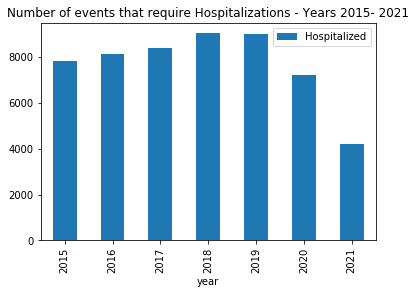

In [44]:
nt.plot(x="year", y=["Hospitalized"], title="Number of events that require Hospitalizations - Years 2015- 2021", kind="bar")

<h5>3.Grouping by State</h5>

In [45]:
st = data_model.groupby(['State']).sum().reset_index()
st.head()

,State,NatureTitle,year,Hospitalized
0,Alabama,122464,4409030,1751.0
1,Alaska,1782,58535,25.0
2,American Samoa,410,18156,7.0
3,Arizona,7432,183627,83.0
4,Arkansas,77750,2895329,1030.0


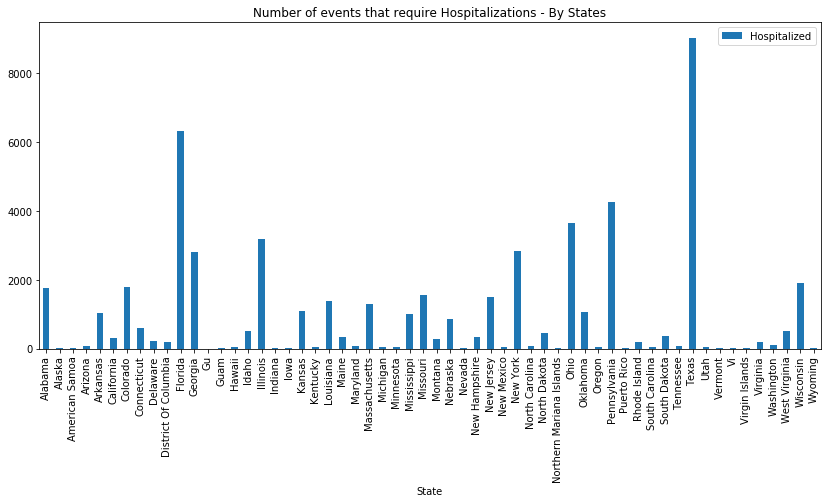

In [46]:
# change the figure size: plt.figure(figsize=(200,6)) # it didn't work.
plt.rcParams["figure.figsize"]=(14, 6)
st.plot(x="State", y=["Hospitalized"], title="Number of events that require Hospitalizations - By States", kind="bar")

In [77]:
top5 = st.nlargest(5, "Hospitalized")
top5

,State,NatureTitle,year,Hospitalized
48,Texas,701324,22197280,9027.0
10,Florida,488982,14149210,6323.0
42,Pennsylvania,339370,10708200,4255.0
39,Ohio,288989,10379398,3656.0
16,Illinois,248404,8050613,3171.0


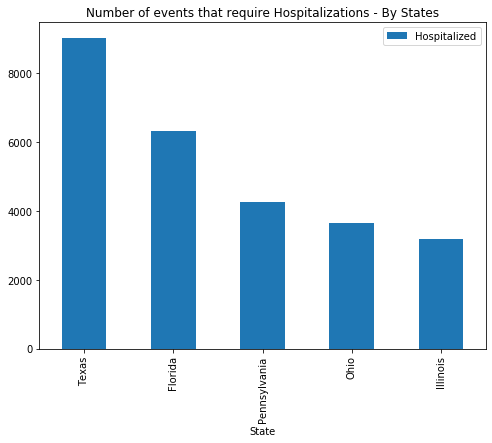

In [79]:
plt.rcParams["figure.figsize"]=(8, 6)
top5.plot(x="State", y=["Hospitalized"], title="Number of events that require Hospitalizations - By States", kind="bar")

## 4. Data Modeling

In [47]:
data_model = data_model[['NatureTitle', 'year','Hospitalized']]
data_model.head()

,NatureTitle,year,Hospitalized
0,66,2015,1.0
1,157,2015,1.0
2,178,2015,1.0
3,159,2015,1.0
4,66,2015,1.0


In [48]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66635 entries, 0 to 66634
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NatureTitle   66635 non-null  int64  
 1   year          66635 non-null  int64  
 2   Hospitalized  66635 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.5 MB


In [49]:
data_model.to_csv('cleandataset_osha.csv', sep='\t',index=True) 

Target/Depend variable: Hospitalized column: Number of events that may not or require Hospitalizations. 0 means No Hospitalization and 1 means Yes Hospitalization/

<h5>1.Logistic Regression</h5>

In [50]:
X = data_model.iloc[:, :-1].values 
y = data_model.iloc[:, -1].values 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [52]:
print(X)

[[  66 2015]
 [ 157 2015]
 [ 178 2015]
 ...
 [  37 2021]
 [  59 2021]
 [  97 2021]]


In [53]:
print(y)

[1. 1. 1. ... 1. 1. 1.]


In [54]:
print(X_train)

[[   3 2016]
 [  59 2015]
 [   3 2015]
 ...
 [ 111 2019]
 [   3 2019]
 [   3 2019]]


In [55]:
print(y_train)

[1. 1. 0. ... 1. 0. 0.]


In [56]:
print(X_test)

[[   3 2019]
 [  18 2018]
 [   3 2021]
 ...
 [  66 2016]
 [  66 2017]
 [ 159 2020]]


In [57]:
print(y_test)

[0. 1. 0. ... 1. 1. 1.]


Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #do not include the State column
X_test = sc.transform(X_test) #do not include the State column

In [59]:
print(X_train)

[[-1.14614413 -0.94732736]
 [-0.07359424 -1.48741603]
 [-1.14614413 -1.48741603]
 ...
 [ 0.92234494  0.67293863]
 [-1.14614413  0.67293863]
 [-1.14614413  0.67293863]]


In [60]:
print(X_test)

[[-1.14614413  0.67293863]
 [-0.85885398  0.13284997]
 [-1.14614413  1.75311597]
 ...
 [ 0.06047449 -0.94732736]
 [ 0.06047449 -0.4072387 ]
 [ 1.84167342  1.2130273 ]]


**Training the Logistic Regression model on the Training set**

In [61]:
from sklearn.linear_model import LogisticRegression #class = LogisticRegression
classifier = LogisticRegression(random_state = 0)#, solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting a new result : Xtest first row values

In [62]:
print(classifier.predict(sc.transform([[3,2019]]))) #added the first row of the X_Test features = 3 and 1.0. Getting the first row of predictor= 0. scale because it has the original values

[0.]


Predicting the Test set results

In [63]:
y_pred = classifier.predict(X_test) #model type = classifier object
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # left value model predicted/ right value real prediction

[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Reviewing the accuracy of the model by a Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred, labels=[1,0]) #to get only the two classes add: labels=[1,0]
print(cm)
accuracy_score(y_test, y_pred) 

[[12251  1206]
 [   37  3165]]


0.9253856774116094

<p>12251 correctly classified of class 0 - not hospitalized cases / 37 incorrectly classified of class 0 - not hospitalized cases. 
<p>3165 correctly classified of class 1 - hospitalized cases/ 1206 incorrectly classified of class 1 - hospitalized cases

The model brings 92.5% of correct predictions in the test set

We have a high number of incorrectly classified of class 1 - hospitalized cases : 1206

**Visualization of Train set**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


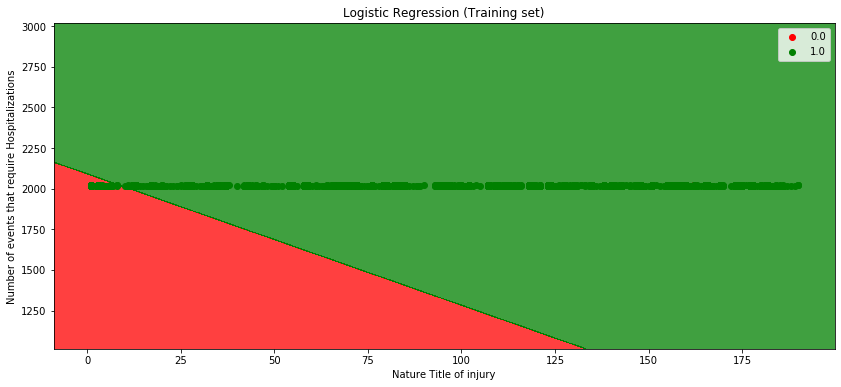

In [65]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Nature Title of injury')
plt.ylabel('Number of events that require Hospitalizations')
plt.legend()
plt.show()

**Visualization of Test set**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


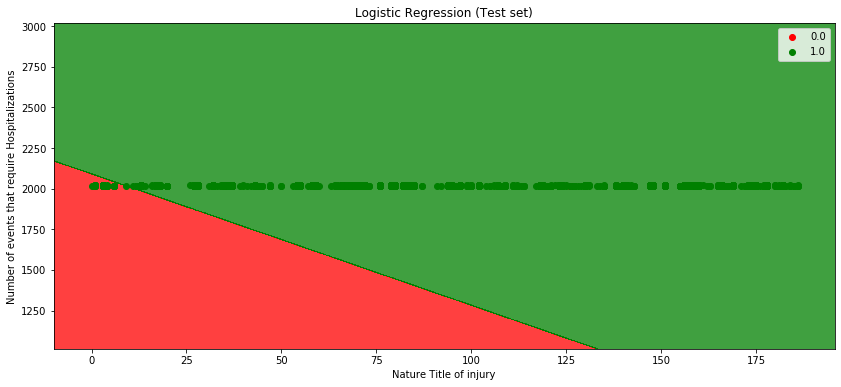

In [66]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Nature Title of injury')
plt.ylabel('Number of events that require Hospitalizations')
plt.legend()
plt.show()

**Training the K-NN model on the Training set**

In [67]:
from sklearn.neighbors import KNeighborsClassifier #class = KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #'minkowski'= euclidian distance
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
print(classifier.predict(sc.transform([[3,2019]]))) #added the first row of the X_Test features = 3 and 1.0. Getting the first row of predictor= 0. scale because it has the original values

[0.]


In [69]:
y_pred = classifier.predict(X_test) #model type = classifier object
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # right value real prediction

[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred, labels=[1,0]) #to get only the two classes add: labels=[1,0]
print(cm)
accuracy_score(y_test, y_pred)

[[12434  1023]
 [  423  2779]]


0.9132000720331352

<p>12434 correctly classified of class 0 - not hospitalized cases / 423 incorrectly classified of class 0 - not hospitalized cases. 
<p>2779 correctly classified of class 1 - hospitalized cases/ 1023 incorrectly classified of class 1 - hospitalized cases

The model brings 91% of correct predictions in the test set
    
<p>We have a high number of incorrectly classified of class 1 - hospitalized cases : 1023

**Training the SVM model on the Training set**

In [71]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [72]:
print(classifier.predict(sc.transform([[3,2019]]))) 

[0.]


In [73]:
y_pred = classifier.predict(X_test) #model type = classifier object
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # right value real prediction

[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred, labels=[1,0]) #to get only the two classes add: labels=[1,0]
print(cm)
accuracy_score(y_test, y_pred)

[[12250  1207]
 [   37  3165]]


0.9253256497989075

<p>12250 correctly classified of class 0 - not hospitalized cases / 37 incorrectly classified of class 0 - not hospitalized cases. 
<p>3165 correctly classified of class 1 - hospitalized cases/ 1207 incorrectly classified of class 1 - hospitalized cases

<p>The model brings 92.53% of correct predictions in the test set


## Conclusions:
<p>To get better results, we can apply a non-linear classifier. 
<p>Logistic Regression and SVM models have higher accuracy of 92%. Both models have higher False Positives - 1207 than the KNN model - 1023, but we considered it is better to incorrectly remit a worker to the Hospital instead of don't do it. This project is not related to reducing healthcare expenses; rather, it aims to predict the number of Labor injuries that may improve workers' health.